In [2]:
##!pip install tensorflow==2.0.0
import tensorflow 
from tensorflow import keras
import keras

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Input
from keras.models import Model
from keras import backend as K
from keras import optimizers

In [4]:
!pip install matplotlib
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

In [5]:
!pip install sklearn
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [6]:
train_x = np.load("2016-2019model_trian_input.npy")
print(train_x.shape)
train_y = np.load("2016-2019model_trian_output.npy")
print(train_y.shape)
test_x = np.load("2016-2019model_test_input.npy")
print(test_x.shape)

(330, 3, 24)
(330, 24)
(10, 3, 24)


In [8]:
##location onehot
train_loc = np.zeros([1,10], dtype = int)
for i in range(0,10):
        for z in range(0,33):
            x = np.zeros([1,10], dtype = int)
            x[:,i]=1
            train_loc = np.concatenate((train_loc,x),axis=0)

train_loc = np.delete(train_loc, [0], axis=0)
train_loc = train_loc[:,np.newaxis,:]
train_loc = np.squeeze(train_loc, axis=(1,))

test_loc = np.zeros([1,10], dtype = int)
for i in range(0,10):
        for z in range(0,1):
            x = np.zeros([1,10], dtype = int)
            x[:,i]=1
            test_loc = np.concatenate((test_loc,x),axis=0)

test_loc = np.delete(test_loc, [0], axis=0)
test_loc = test_loc[:,np.newaxis,:]
test_loc = np.squeeze(test_loc, axis=(1,))

In [9]:
train_x_input = Input(shape=(3,24,))


lstm1 = LSTM(24, return_sequences=True)
lstm_out1 = lstm1(train_x_input)
lstm2 = LSTM(24, return_sequences=True)
lstm_out2 = lstm2(lstm_out1)
lstm3 = LSTM(24, return_sequences=True)
lstm_out3 = lstm3(lstm_out2)
lstm4 = LSTM(24, return_sequences=False)
lstm_out = lstm4(lstm_out3)

loc_train_input = Input(shape=(10,))
    
x = keras.layers.concatenate([lstm_out, loc_train_input],axis=1)
x2_den = Dense(24, activation='relu')(x)
x2_dro = Dropout(0.5)(x2_den)
x3_den = Dense(24, activation='relu')(x2_dro)
x3_dro = Dropout(0.5)(x3_den)
x4_den = Dense(24, activation='relu')(x3_dro)
x_output = Dropout(0.5)(x4_den)
main_output = Dense(24, activation='relu')(x_output)

model = Model(inputs=[train_x_input, loc_train_input], outputs=main_output)



sgd = optimizers.RMSprop(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=sgd)


model.summary()
model.fit([train_x, train_loc], train_y, 
          batch_size=1, epochs=100, validation_split=0.1)


##model.save('36months_model.h5')


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 24)        0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 3, 24)        4704        input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 3, 24)        4704        lstm_1[0][0]                     
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 3, 24)        4704        lstm_2[0][0]                     
____________________________________________________________________________________________

297/297 [==============================] - ETA: 0s - loss: 0.007 - 1s 4ms/step - loss: 0.0084 - val_loss: 0.0419
Epoch 49/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0082 - val_loss: 0.0431
Epoch 50/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0075 - val_loss: 0.0442
Epoch 51/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0077 - val_loss: 0.0389
Epoch 52/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0078 - val_loss: 0.0409
Epoch 53/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0079 - val_loss: 0.0452
Epoch 54/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0074 - val_loss: 0.0455
Epoch 55/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0079 - val_loss: 0.0419
Epoch 56/100
297/297 [==============================] - 1s 4ms/step - loss: 0.0080 - val_loss: 0.0391
Epoch 57/100
297/297 [==============================] - 1s 4ms/step - l

In [10]:
predict = model.predict([test_x,test_loc])
predict.shape

(10, 24)

In [13]:
valid = np.load("2016-2019true_valid.npy")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

mse_list=[]
mas_list=[]
rmse_val_list=[]

for i in range(0,10):
    p=predict[i].tolist()
    v=valid[i].tolist()
    mse=mean_squared_error(v, p)
    mse_list.append(mse)
    mas=mean_absolute_error(v, p)
    mas_list.append(mas)
    rmse_val = rmse(np.array(v), np.array(p))
    rmse_val_list.append(rmse_val)
    
from numpy import *
print(mean(mse_list))
print(mean(mas_list))
print(mean(rmse_val_list))

0.0038191095184159163
0.0433206161451576
0.056022785544549855


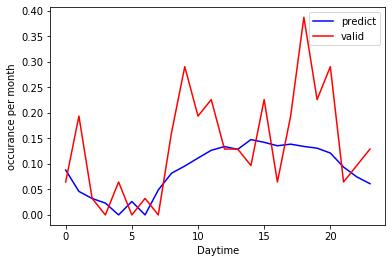

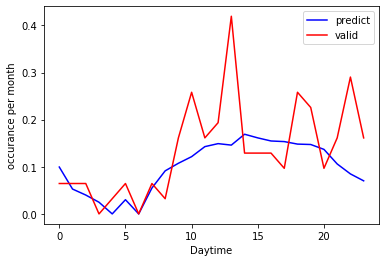

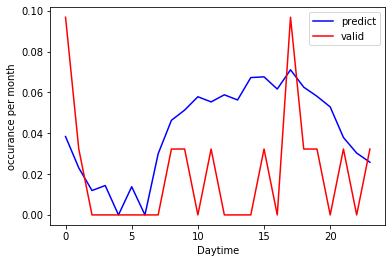

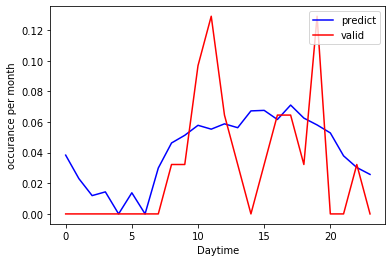

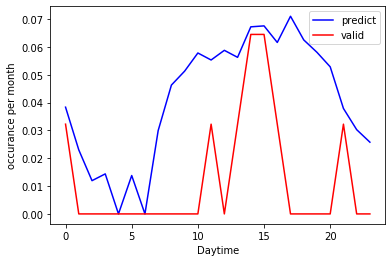

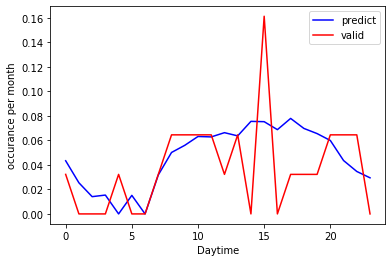

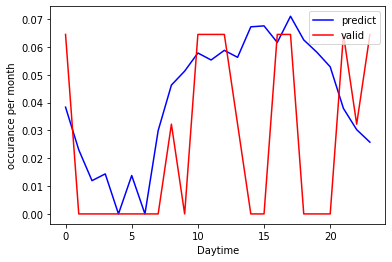

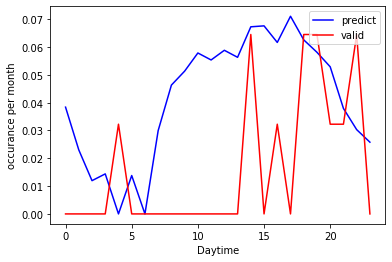

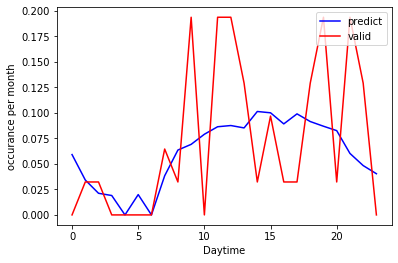

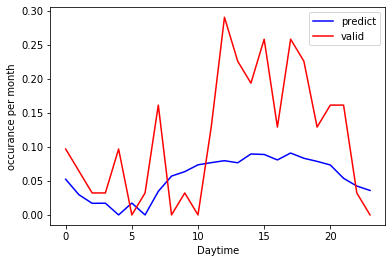

In [14]:
for i in range(0,10):
    plt.figure()
    plt.plot(range(len(predict[i])),predict[i],'b',label="predict")
    plt.plot(range(len(predict[i])),valid[i],'r',label="valid")
    plt.legend(loc="upper right") #显示图中的标签
    plt.xlabel("Daytime")
    plt.ylabel('occurance per month')
    plt.show()